# Movie Data Analysis 
### Analysis of movies released between 1980 to 2020

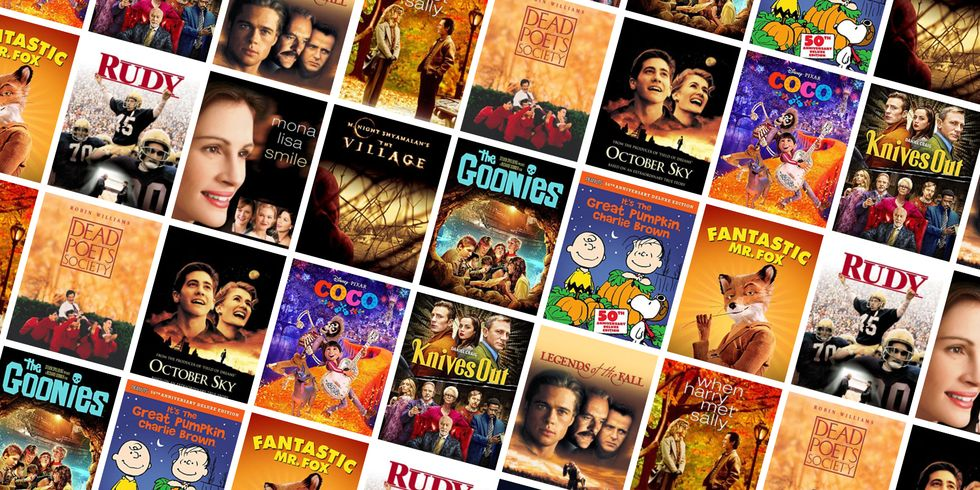

### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline 
matplotlib.rcParams['figure.figsize']= (12,8)

### Loading the CSV into a DataFrame

In [2]:
df= pd.read_csv("D:\ds\movies.csv")
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Checking for null values 

In [3]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
df.shape

(7668, 15)

### Percentage missing values

In [5]:
df.isnull().sum()*100/7668

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [6]:
df.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [7]:
df.isnull().sum().sum()

2473

### Replacing gross with mean of the column

In [8]:
df['gross'].mean()

78500541.01778312

In [9]:
df['gross']= df['gross'].fillna(value= df['gross'].mean())

In [10]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,3.984634e+07,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,7.850054e+07,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,7.850054e+07,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,7.850054e+07,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,7.850054e+07,NaN,120.0


In [11]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross          0
company       17
runtime        4
dtype: int64

In [12]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,7.850054e+07,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,7.850054e+07,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,7.850054e+07,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,7.850054e+07,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,7.850054e+07,PK 65 Films,102.0


### Dropping a few rows with missing values 

In [13]:
df=df.dropna(subset=['score'])

In [14]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,7.850054e+07,Abominable Pictures,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,7.850054e+07,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,7.850054e+07,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,7.850054e+07,Embi Productions,NaN
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,7.850054e+07,PK 65 Films,102.0


In [15]:
df=df.dropna(subset=['score'])

In [16]:
df.isnull().sum()

name           0
rating        75
genre          0
year           0
released       2
score          0
votes          0
director       0
writer         3
star           1
country        3
budget      2171
gross          0
company       15
runtime        4
dtype: int64

In [17]:
df=df.dropna(subset=['writer' , 'star' ,  'country', 'company', 'released', 'runtime'])

In [18]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,7.850054e+07,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,1.326600e+04,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,7.850054e+07,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,7.850054e+07,Cactus Blue Entertainment,90.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,7.850054e+07,PK 65 Films,102.0


In [19]:
df.isnull().sum()

name           0
rating        69
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2157
gross          0
company        0
runtime        0
dtype: int64

In [20]:
# we are left with rating and budget 

### Finding out the categories of rating

In [21]:
df1=df.groupby('rating')
df1.sum()

,year,score,votes,budget,gross,runtime
rating,,,,,,
Approved,1981,3.4,5300.0,6.500000e+06,3.656528e+07,115.0
G,305469,1008.3,14932028.0,5.916570e+09,2.166909e+10,13922.0
NC-17,45946,150.6,1139600.0,1.207500e+08,2.475546e+08,2491.0
Not Rated,565729,1950.8,8243968.0,3.812042e+08,6.489206e+09,33017.0
PG,2493268,7776.1,83247375.0,4.012750e+10,1.323443e+11,128704.0
PG-13,4226997,13267.5,254515869.0,8.825308e+10,2.752739e+11,230020.0
R,7377447,23787.1,309364207.0,6.053987e+10,1.605058e+11,397141.0
TV-14,2019,6.3,4200.0,0.000000e+00,5.756185e+06,98.0
TV-MA,18064,63.2,326100.0,5.400000e+07,7.125370e+08,972.0


In [22]:
df2 = df.groupby(['rating'])['rating'].count()
df2

rating
Approved        1
G             153
NC-17          23
Not Rated     282
PG           1249
PG-13        2110
R            3689
TV-14           1
TV-MA           9
TV-PG           4
Unrated        50
X               3
Name: rating, dtype: int64

In [23]:
df2.sort_values(ascending=False)

rating
R            3689
PG-13        2110
PG           1249
Not Rated     282
G             153
Unrated        50
NC-17          23
TV-MA           9
TV-PG           4
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

### Replacing missing values with the most frequent rating 'R'

In [24]:
df['rating'] = df['rating'].fillna('R')


In [25]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,7.850054e+07,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,1.326600e+04,Roxwell Films,87.0
7660,Aloha Surf Hotel,R,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,7.850054e+07,Abominable Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,7.850054e+07,Cactus Blue Entertainment,90.0
7667,Tee em el,R,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,7.850054e+07,PK 65 Films,102.0


In [26]:
df.isnull().sum() #almost 30% of budget data is missing

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2157
gross          0
company        0
runtime        0
dtype: int64

### Dropping the rows with missing values of budget to find out if the rest of the budget correlates with the given columns 

In [27]:
df3=df.dropna(subset=['budget'])
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,3.984634e+07,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,2.454878e+08,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,1.111055e+08,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,4.614216e+08,Beijing Diqi Yinxiang Entertainment,149.0
7654,Star Trek First Frontier,R,Sci-Fi,2020,"September 8, 2020 (United States)",5.7,165.0,Kenneth Smith,Keith Brooks,Robert Pralgo,United States,370000.0,7.850054e+07,An Impulsive Production,85.0


In [28]:
df3.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.062987,0.209721,0.331031,0.272719,0.077755
score,0.062987,1.000000,0.472494,0.075776,0.220639,0.418004
votes,0.209721,0.472494,1.000000,0.442096,0.614482,0.352436
budget,0.331031,0.075776,0.442096,1.000000,0.739083,0.320074
gross,0.272719,0.220639,0.614482,0.739083,1.000000,0.274171
runtime,0.077755,0.418004,0.352436,0.320074,0.274171,1.000000


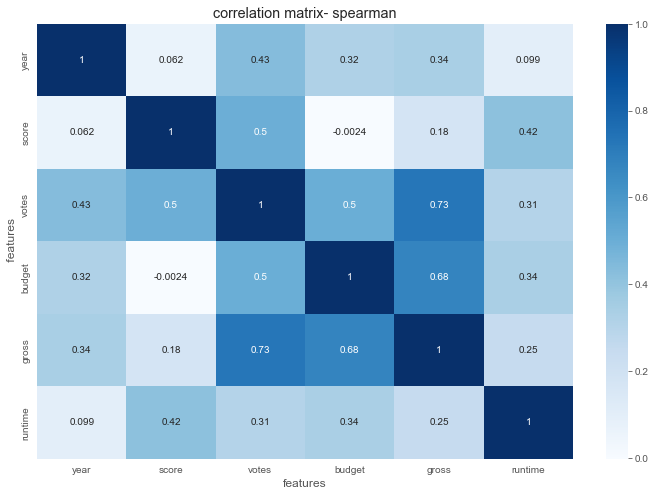

In [29]:
correlation_matrix=df3.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

plt.xlabel('features')
plt.ylabel(' features')
plt.title('correlation matrix- spearman')
plt.show()

### It is seen that the remaining budget data correlates well with the rest columns -this can give us valueable insights. Thus it is to be noted that rows with NaN values for budget column must not be dropped but imputed with a central tendency -like mean, median, or mode.

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget'>

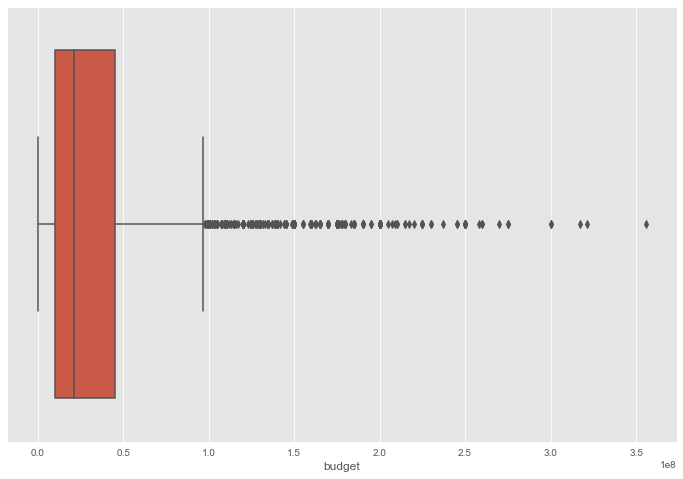

In [30]:
sns.boxplot(df.budget)

### The box plot signifies that the data is skewed therefore missing data must be replaced by median or mode but not mean.

In [31]:
df['budget'] = df['budget'].fillna(df['budget'].median())

In [32]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,7.850054e+07,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,21000000.0,1.326600e+04,Roxwell Films,87.0
7660,Aloha Surf Hotel,R,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,21000000.0,7.850054e+07,Abominable Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,21000000.0,7.850054e+07,Cactus Blue Entertainment,90.0
7667,Tee em el,R,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,21000000.0,7.850054e+07,PK 65 Films,102.0


In [33]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098278,0.223353,0.292600,0.252438,0.119789
score,0.098278,1.000000,0.409432,0.061525,0.182866,0.399965
votes,0.223353,0.409432,1.000000,0.459610,0.628744,0.308907
budget,0.292600,0.061525,0.459610,1.000000,0.742807,0.272944
gross,0.252438,0.182866,0.628744,0.742807,1.000000,0.241296
runtime,0.119789,0.399965,0.308907,0.272944,0.241296,1.000000


In [34]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## CLEAN !!!!

# ANALYSIS

### Sorting gross highest to lowest

In [35]:
df['gross']=df['gross'].astype('int64')

In [36]:
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2048359754,Marvel Studios,149.0


### Drop duplicates if any

In [38]:
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [39]:
df['company'].drop_duplicates().sort_values(ascending=False).tail()

5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, dtype: object

In [40]:
df['company'].drop_duplicates().sort_values(ascending=False).count()

2378

### Sorting the rows from highest to lowest scores received 

In [41]:
t=df.sort_values(by=['score'], inplace=True, ascending=False)

In [42]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1005973645,Warner Bros.,152.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1146030912,New Line Cinema,201.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,322161245,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,213928762,Miramax,154.0


###   How many movies are striclty meant for adults ?

In [43]:
df.groupby('rating').count()

,name,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,,,,,,,,,,,,,,
Approved,1,1,1,1,1,1,1,1,1,1,1,1,1,1
G,153,153,153,153,153,153,153,153,153,153,153,153,153,153
NC-17,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Not Rated,282,282,282,282,282,282,282,282,282,282,282,282,282,282
PG,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249
PG-13,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110
R,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758
TV-14,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TV-MA,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [44]:
conditions= [
    df['rating']=='NC-17',
    df['rating']=='X'
    
    
]

values =['18+' , '18+']
df['18+']= np.select(conditions, values)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291,Castle Rock Entertainment,142.0,0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1005973645,Warner Bros.,152.0,0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1146030912,New Line Cinema,201.0,0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,322161245,Universal Pictures,195.0,0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,213928762,Miramax,154.0,0


In [45]:
df[df['18+']=='18+'].count()

name        26
rating      26
genre       26
year        26
released    26
score       26
votes       26
director    26
writer      26
star        26
country     26
budget      26
gross       26
company     26
runtime     26
18+         26
dtype: int64

### 26 movies are meant for adults only.

<AxesSubplot:title={'center':'ratings '}, xlabel='ratings', ylabel='no. of movies'>

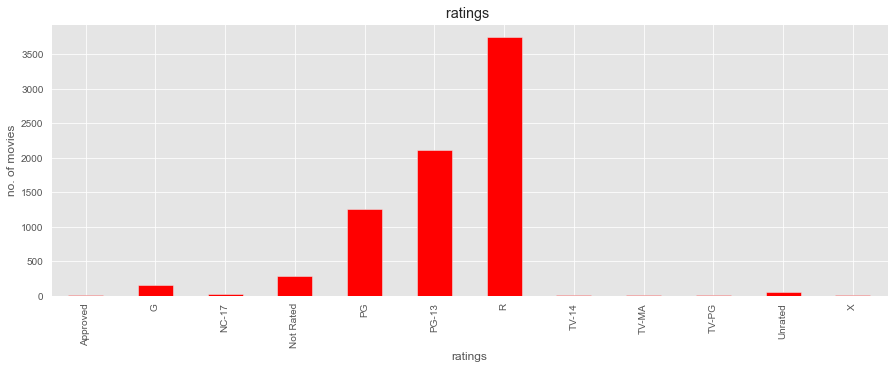

In [46]:
r = df.groupby(['rating'])['rating'].count()

r.plot(kind='bar', title='ratings ', ylabel='no. of movies',
         xlabel='ratings', figsize=(15, 5), color='red')

### Most movies are rated R, followed by PG-13 then PG




<AxesSubplot:title={'center':'ratings '}, xlabel='ratings', ylabel='gross'>

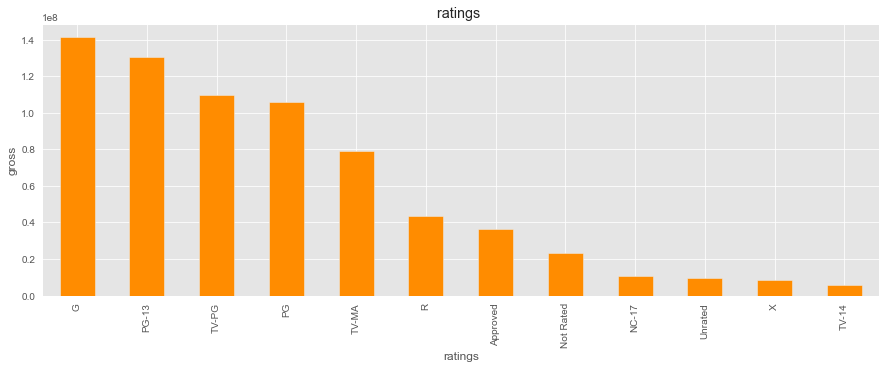

In [47]:
rg = df.groupby(['rating'])['gross'].mean().sort_values(ascending=False)
rg.plot(kind='bar', title='ratings ', ylabel='gross',
         xlabel='ratings', figsize=(15, 5), color='darkorange')

### It is found out that G or 'general' earns the most followed by PG-13 then TV-PG.

### How many movies were released after 2000 and have a score>6?

In [48]:
df[(df['year']>2000)&(df['score']>6.0)].count()

name        2718
rating      2718
genre       2718
year        2718
released    2718
score       2718
votes       2718
director    2718
writer      2718
star        2718
country     2718
budget      2718
gross       2718
company     2718
runtime     2718
18+         2718
dtype: int64

### 2718 movies are released after 2000 and have a score greater than 6 in this dataset

### How has the no. of movies each year over the years changed ? 

In [49]:
yr=df.groupby('year').count()
yr 
#2020 was particularly low because of the pandemic

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+
year,,,,,,,,,,,,,,,
1980,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
1981,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
1982,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
1983,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
1984,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167
1985,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
1986,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
1987,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
1988,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200


<AxesSubplot:xlabel='year'>

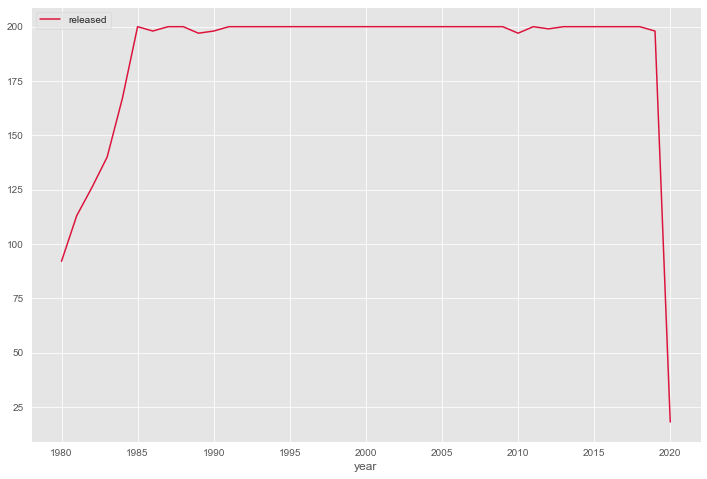

In [50]:
yr.plot(y='released' , color='crimson')

### It is noticed that number of movies in this dataset have not changed much over the years. There is a sharp increase from 80s to 90s. A sudden decline in the no. of  movies released in 2020 could be due to the world wide pandemic. 

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


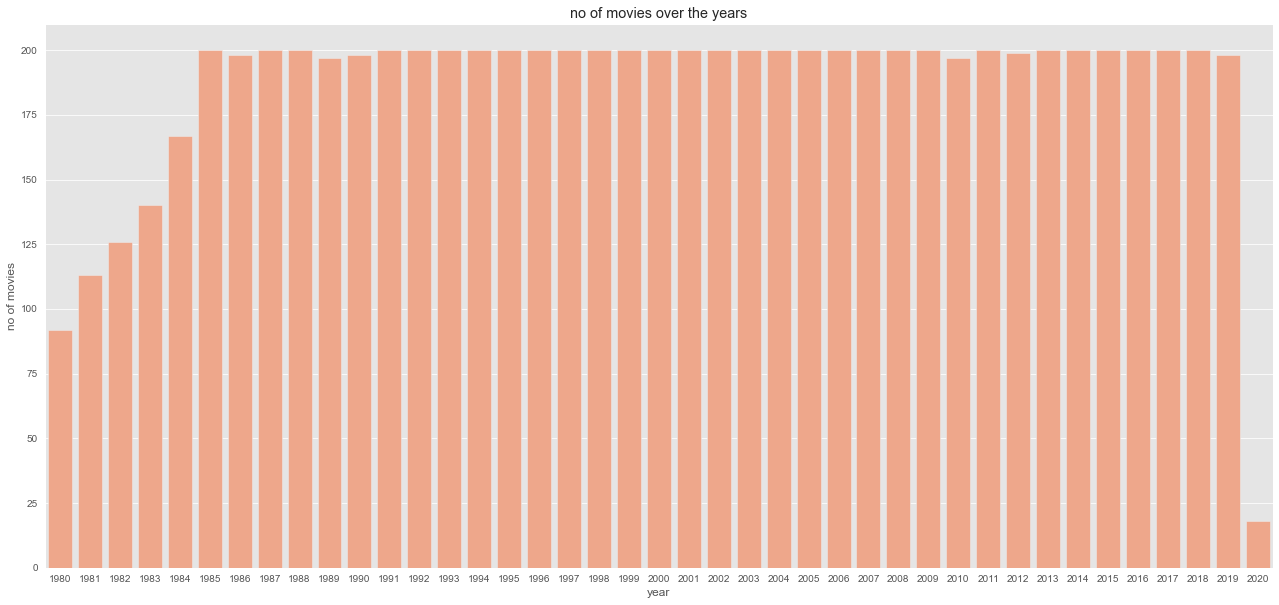

In [51]:
plt.figure(figsize=(22,10))
sns.countplot(df['year'], color='lightsalmon')
plt.xlabel('year')
plt.ylabel('no of movies')
plt.title('no of movies over the years')
plt.show()

### Graphing the number of movies categorised by age restrictions before and after 2000

In [52]:
yrgrp=df.year.unique()

In [53]:
yrgrp

array([1994, 2008, 2003, 1993, 1999, 2010, 2001, 2002, 1990, 1980, 2019,
       2014, 1998, 1991, 1995, 1997, 2000, 1985, 2006, 1988, 2011, 2004,
       2012, 1984, 2016, 2017, 2009, 2007, 2018, 1981, 1992, 1983, 1987,
       1986, 1989, 2005, 2015, 2013, 1982, 1996, 2020], dtype=int64)

In [54]:
yrgrp.min()

1980

In [55]:
before2000= df[(df.year<2000)]


In [56]:
before2000.count().head(2)

name      3631
rating    3631
dtype: int64

In [57]:
after2000=df[(df.year>=2000)]


In [58]:
after2000.count().head(2)

name      4012
rating    4012
dtype: int64

In [59]:
mb= before2000.rating.value_counts().head()
mb

R            1895
PG            781
PG-13         732
G              97
Not Rated      78
Name: rating, dtype: int64

In [60]:
ma = after2000.rating.value_counts().head()
ma

R            1863
PG-13        1378
PG            468
Not Rated     204
G              56
Name: rating, dtype: int64

<AxesSubplot:title={'center':'Top 5 ratings of movies released after 2000'}, xlabel='ratings', ylabel='no. of movies'>

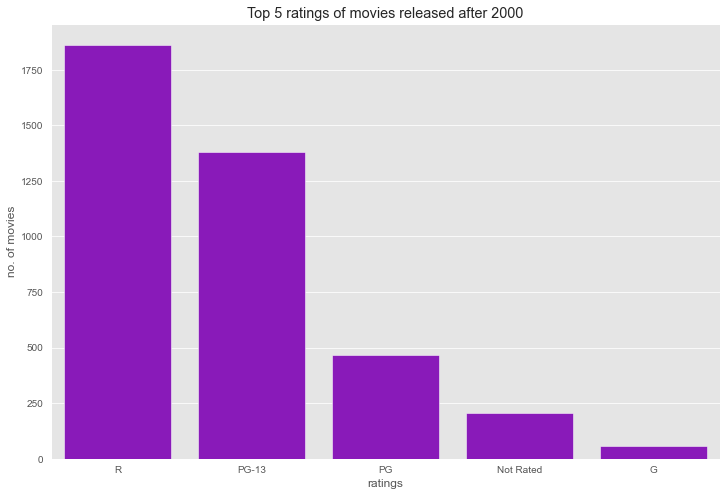

In [61]:
plt.title('Top 5 ratings of movies released after 2000')
plt.xlabel('ratings')
plt.ylabel('no. of movies')
sns.set_style('whitegrid')
sns.barplot(x=ma.index, y=ma.values, color='darkviolet')


<AxesSubplot:title={'center':'Top 5 ratings of movies released before 2000'}, xlabel='ratings', ylabel='no. of movies'>

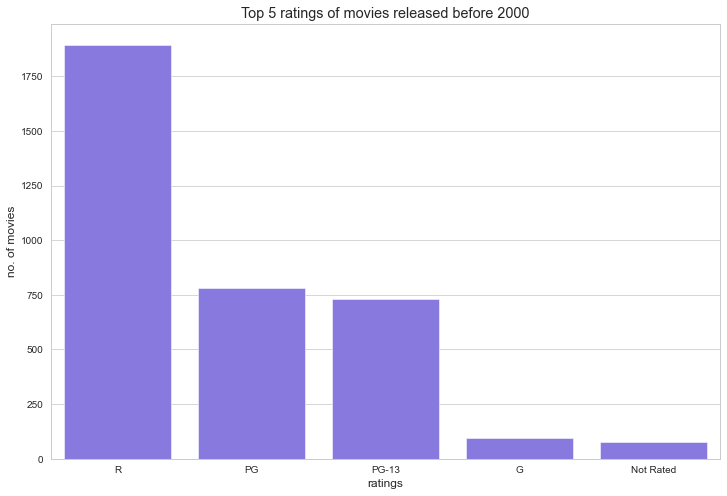

In [62]:
plt.title('Top 5 ratings of movies released before 2000')
plt.xlabel('ratings')
plt.ylabel('no. of movies')
sns.barplot(x=mb.index, y=mb.values, color='mediumslateblue')

### Top countries with most no. of movie releases:


In [63]:
df.country.value_counts()

United States                     5460
United Kingdom                     814
France                             279
Canada                             189
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               38
South Korea                         35
Denmark                             32
New Zealand                         25
Sweden                              25
Mexico                              22
Netherlands                         12
Norway                              12
West Germany                        11
Switzerland                         10
Iran                                10
South Africa                         8
Czech Republic                       8
Belgium                  

In [64]:
c= df.country.value_counts().head(10)
c


United States     5460
United Kingdom     814
France             279
Canada             189
Germany            117
Australia           92
Japan               81
India               62
Italy               61
Spain               47
Name: country, dtype: int64

Text(0, 0.5, 'no of movies')

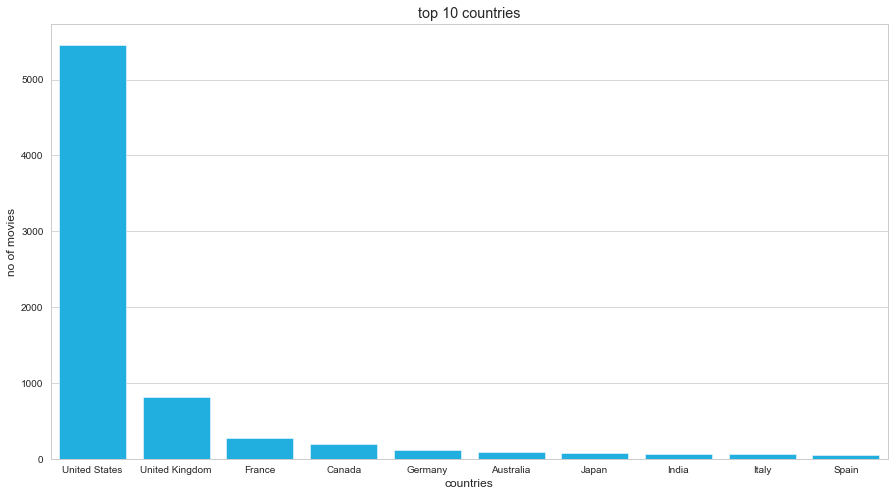

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(x=c.index, y=c.values, color='deepskyblue')
plt.title('top 10 countries')
plt.xlabel('countries')
plt.ylabel('no of movies')

### Top companies which produce the most no. of movies:


In [66]:
df.company.value_counts().head(10)

Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: company, dtype: int64

Text(0, 0.5, 'no of movies')

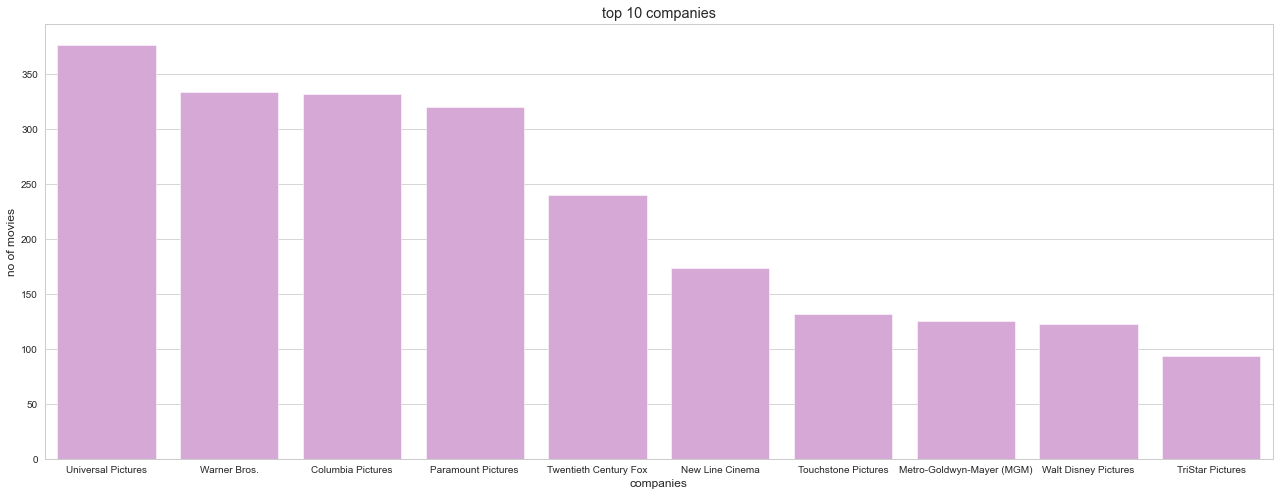

In [67]:
cmp=df.company.value_counts().head(10)
sns.set_style('whitegrid')
plt.figure(figsize=(22,8))
sns.barplot(x=cmp.index, y=cmp.values, color='plum')
plt.title('top 10 companies')
plt.xlabel('companies')
plt.ylabel('no of movies')

### Top 10 Disney movies according to votes

In [68]:
disney= df[df['company']=='Walt Disney Pictures'] #new dataframe for disney movies
disney.sort_values(by=['votes'], inplace=True, ascending=False)
disney.head(10)

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+
4244,Pirates of the Caribbean: the Curse of the Bla...,PG-13,Action,2003,"July 9, 2003 (United States)",8.0,1000000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,140000000.0,654264015,Walt Disney Pictures,143.0,0
2448,The Lion King,G,Animation,1994,"June 24, 1994 (United States)",8.5,970000.0,Roger Allers,Irene Mecchi,Matthew Broderick,United States,45000000.0,1083720877,Walt Disney Pictures,88.0,0
2654,Toy Story,G,Animation,1995,"November 22, 1995 (United States)",8.3,913000.0,John Lasseter,John Lasseter,Tom Hanks,United States,30000000.0,394436586,Walt Disney Pictures,81.0,0
5685,Toy Story 3,G,Animation,2010,"June 18, 2010 (United States)",8.2,776000.0,Lee Unkrich,John Lasseter,Tom Hanks,United States,200000000.0,1066970811,Walt Disney Pictures,103.0,0
4852,Pirates of the Caribbean: Dead Man's Chest,PG-13,Action,2006,"July 7, 2006 (United States)",7.3,668000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,225000000.0,1066179747,Walt Disney Pictures,151.0,0
5053,Ratatouille,G,Animation,2007,"June 29, 2007 (United States)",8.0,660000.0,Brad Bird,Brad Bird,Brad Garrett,United States,150000000.0,623726085,Walt Disney Pictures,111.0,0
7043,Thor: Ragnarok,PG-13,Action,2017,"November 3, 2017 (United States)",7.9,628000.0,Taika Waititi,Eric Pearson,Chris Hemsworth,United States,180000000.0,853983911,Walt Disney Pictures,130.0,0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,960996492,Walt Disney Pictures,169.0,0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1332698830,Walt Disney Pictures,152.0,0
5860,Pirates of the Caribbean: on Stranger Tides,PG-13,Action,2011,"May 20, 2011 (United States)",6.6,492000.0,Rob Marshall,Ted Elliott,Johnny Depp,United States,250000000.0,1045713802,Walt Disney Pictures,136.0,0


<AxesSubplot:ylabel='name'>

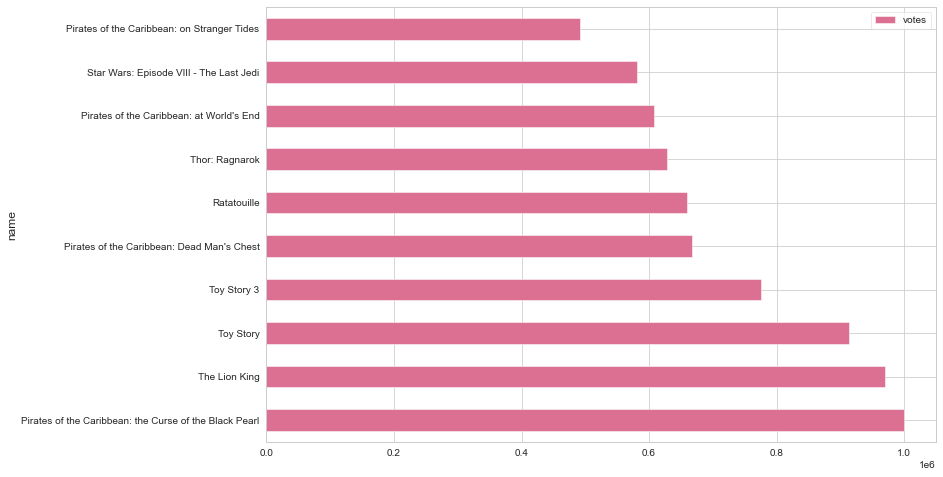

In [69]:
disney.head(10).plot(x="name", y="votes", kind="barh", color='palevioletred')

### Worst 20th Century Fox Films by gross

In [70]:
fox= df[df['company']=='Twentieth Century Fox']
fox.sort_values(by=['gross'], inplace=True, ascending=False)
fox.tail(10)

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+
2360,Ghost in the Machine,R,Horror,1993,"December 29, 1993 (United States)",4.6,3400.0,Rachel Talalay,William Davies,Karen Allen,United States,12000000.0,5086909,Twentieth Century Fox,95.0,0
1935,Dutch,PG-13,Comedy,1991,"July 19, 1991 (United States)",6.5,12000.0,Peter Faiman,John Hughes,Ed O'Neill,United States,17000000.0,4603929,Twentieth Century Fox,107.0,0
77,Willie & Phil,R,Comedy,1980,"August 15, 1980 (United States)",5.9,415.0,Paul Mazursky,Jean Gruault,Michael Ontkean,United States,5500000.0,4400000,Twentieth Century Fox,115.0,0
2532,PCU,PG-13,Comedy,1994,"April 29, 1994 (United States)",6.6,12000.0,Hart Bochner,Adam Leff,Jeremy Piven,United States,8000000.0,4330020,Twentieth Century Fox,79.0,0
2233,This Is My Life,PG-13,Drama,1992,"February 21, 1992 (United States)",6.1,1100.0,Nora Ephron,Meg Wolitzer,Julie Kavner,United States,21000000.0,2922094,Twentieth Century Fox,105.0,0
621,The Buddy System,PG,Drama,1984,"January 20, 1984 (United States)",5.7,794.0,Glenn Jordan,Mary Agnes Donoghue,Richard Dreyfuss,United States,21000000.0,1820049,Twentieth Century Fox,110.0,0
1616,How I Got Into College,PG-13,Comedy,1989,"May 19, 1989 (United States)",5.8,2100.0,Savage Steve Holland,Terrel Seltzer,Anthony Edwards,United States,10000000.0,1642239,Twentieth Century Fox,86.0,0
1831,Vital Signs,R,Drama,1990,"April 13, 1990 (United States)",5.4,703.0,Marisa Silver,Larry Ketron,Adrian Pasdar,United States,21000000.0,1224605,Twentieth Century Fox,103.0,0
1819,Come See the Paradise,R,Drama,1990,January 1991 (United States),6.7,2600.0,Alan Parker,Alan Parker,Dennis Quaid,United States,17500000.0,947306,Twentieth Century Fox,138.0,0
4853,Idiocracy,R,Adventure,2006,"January 25, 2007 (Germany)",6.6,150000.0,Mike Judge,Mike Judge,Luke Wilson,United States,21000000.0,495303,Twentieth Century Fox,84.0,0


<AxesSubplot:ylabel='name'>

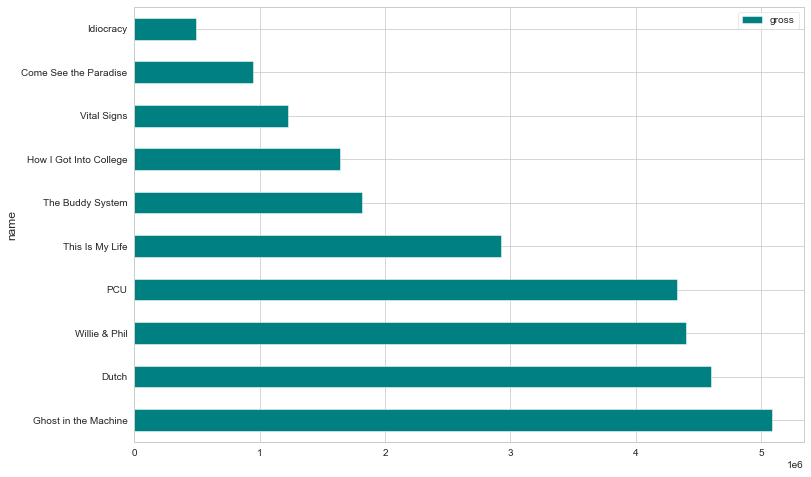

In [71]:
fox.tail(10).plot(x="name", y="gross", kind="barh", color='teal')

### Duration of movies over the years

<AxesSubplot:ylabel='Frequency'>

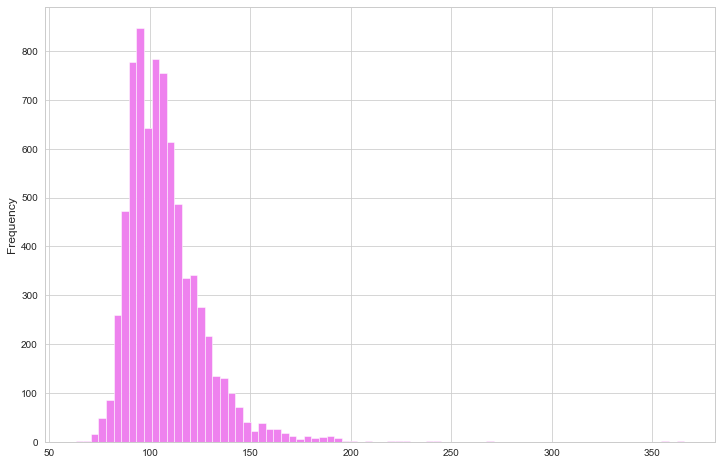

In [72]:
df.runtime.plot(kind='hist' , bins=80, color='violet')

### It has been observed that most movies lie in the range of 80 to 130 minutes

<AxesSubplot:>

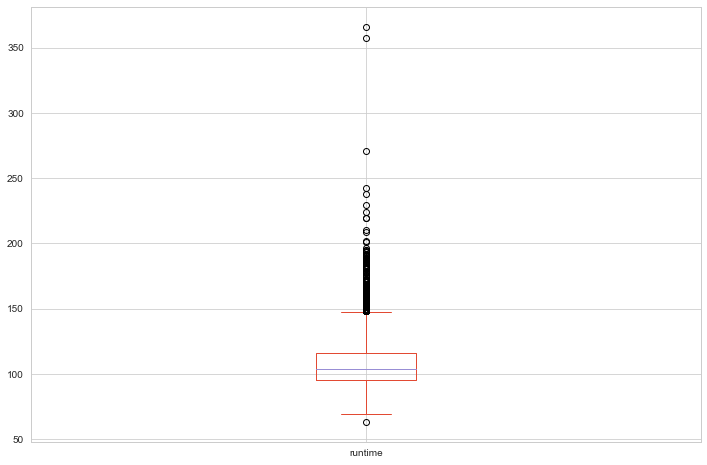

In [73]:
df.runtime.plot(kind='box' )

In [74]:
df[df['runtime']>=150.0].shape

(219, 16)

In [75]:
df[df['runtime']<=40.0].shape

(0, 16)

In [76]:
grouped_movies= df['runtime'].groupby(df['year']).describe()

In [77]:
grouped_movies.head()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1980,92.0,107.402174,20.039554,75.0,96.0,102.5,115.0,219.0
1981,113.0,105.955752,17.820729,78.0,94.0,103.0,115.0,195.0
1982,126.0,105.928571,18.000079,74.0,94.0,103.0,115.0,191.0
1983,140.0,102.892857,16.418404,77.0,93.0,99.0,110.0,193.0
1984,167.0,104.413174,18.961675,79.0,93.0,100.0,110.0,229.0


In [78]:
av= grouped_movies['mean']
av_min= grouped_movies['mean']-grouped_movies['std']
av_max= grouped_movies['mean']+grouped_movies['std']

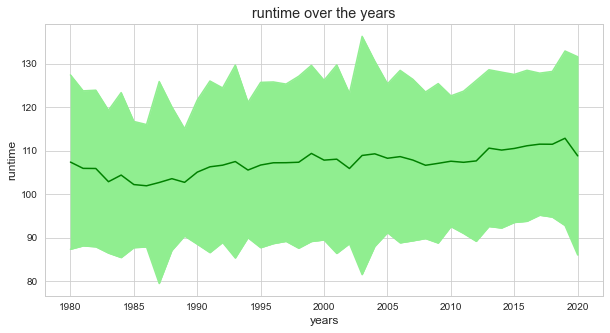

In [79]:
fig, x=plt.subplots(figsize=(10,5))
x.plot(av, color='green')
x.plot(av_max, color='lightgreen')
x.plot(av_min, color='lightgreen')
x.fill_between(grouped_movies.index, av_max, av_min, color='lightgreen' )

plt.xlabel('years')
plt.ylabel('runtime')
plt.title('runtime over the years')
plt.show()

### Duration of movies over a decade

In [80]:
by_dec= df.copy()
by_dec['year']=((by_dec['year']//10)*10).astype('int64')


### It has been observed that the runtime has not changed significantly over the years

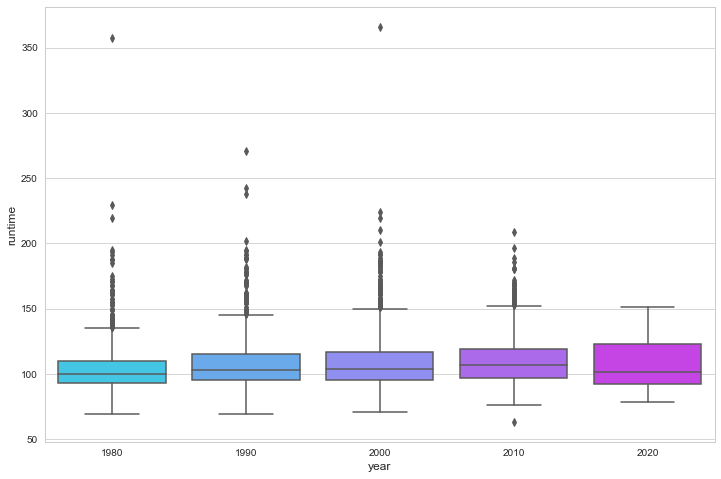

In [81]:
sns.boxplot(x='year', y='runtime', data=by_dec, palette='cool')
plt.show()

### 'The Best of Youth' and 'Little Dorrit' have the highest runtime 

In [82]:
df[df['runtime']>350]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,21000.0,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,21000000.0,2799773,BiBi Film,366.0,0
1218,Little Dorrit,G,Drama,1987,"October 21, 1988 (United States)",7.3,1000.0,Christine Edzard,Charles Dickens,Derek Jacobi,United Kingdom,21000000.0,1025228,Sands,357.0,0


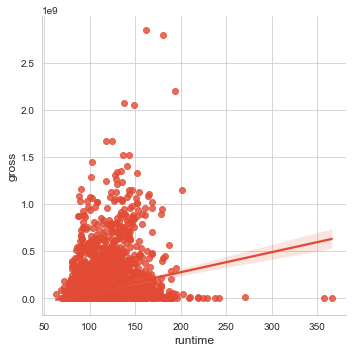

In [83]:
sns.lmplot(x="runtime", y="gross", data=df)

### It is to be noticed that gross earnings decrease when duration is too high or too low.

### How has budget changed over the years?

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


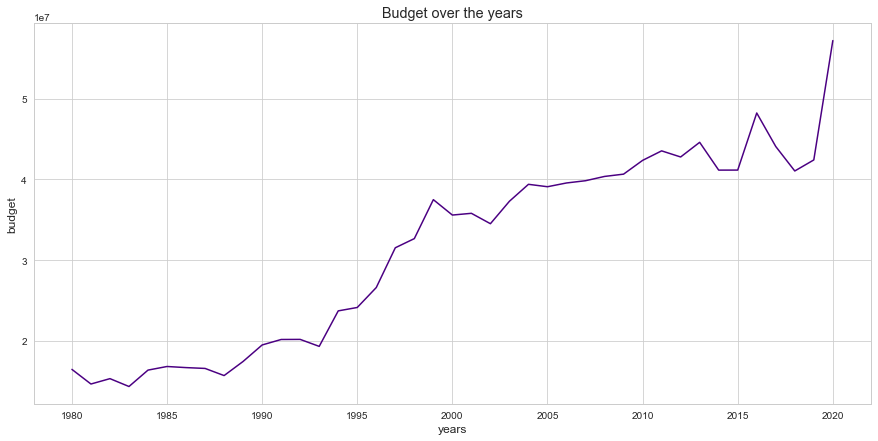

In [84]:
b= df.groupby('year')['budget'].mean()
plt.figure(figsize=(15,7))

sns.lineplot(b.index, b.values, color='indigo')
plt.title('Budget over the years')
plt.xlabel('years')
plt.ylabel('budget')
plt.show()


### Budget has drastically increased over the years. Probable reasons are union rates, actors' demands, inflation, cost of new equipment and special effects. 

### Budget's correlation with gross 

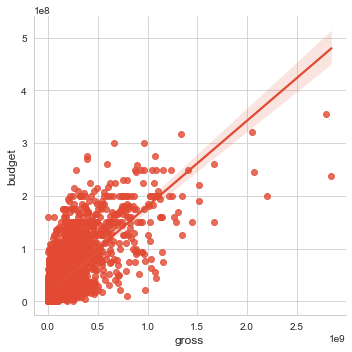

In [85]:

sns.lmplot(x="gross", y="budget", data=df)

### Month with the highest movie releases:

In [86]:
df['month']=df['released']
df['month'] = df.released.str.split().str.get(0) #extracting month
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+,month
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291,Castle Rock Entertainment,142.0,0,October
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1005973645,Warner Bros.,152.0,0,July
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1146030912,New Line Cinema,201.0,0,December
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,322161245,Universal Pictures,195.0,0,February
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,213928762,Miramax,154.0,0,October


In [87]:
m= df.month.value_counts()
m

October      755
August       736
March        683
November     652
September    649
April        644
February     613
January      597
July         584
December     581
May          580
June         560
1985           2
1990           1
1995           1
1982           1
1987           1
2013           1
2019           1
1981           1
Name: month, dtype: int64

In [88]:
w=df[df['month']=='1985']
w
# 'released' column with year (for example 1985 or 2013) dont have month mentioned hence we have not considered them. 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+,month
786,Taipei Story,Not Rated,Drama,1985,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,21000000.0,35336,Evergreen Film Company,119.0,0,1985
800,O.C. and Stiggs,R,Comedy,1985,1985 (United States),5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,7000000.0,29815,Metro-Goldwyn-Mayer (MGM),109.0,0,1985


### Most movies are released in October and least in June in the given dataset.

Text(0, 0.5, 'no of movies')

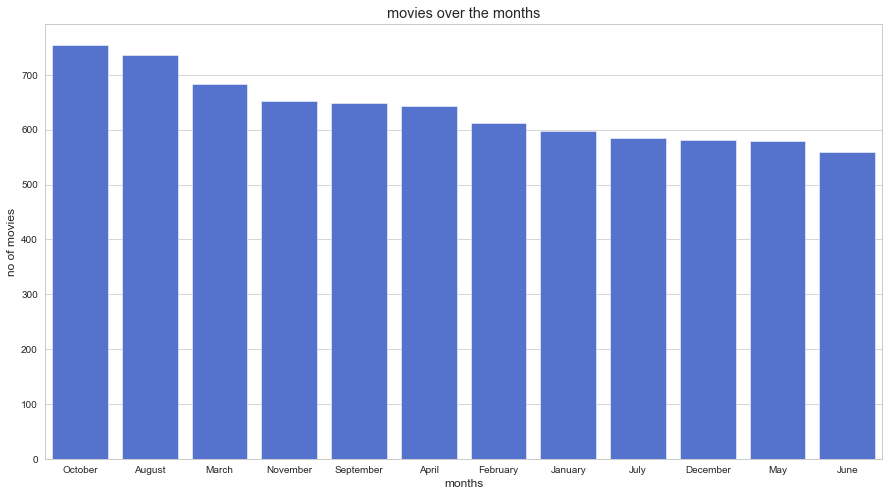

In [89]:
plt.figure(figsize=(15,8))
sns.barplot(x=m.head(12).index, y=m.head(12).values, color='royalblue')
plt.title('movies over the months')
plt.xlabel('months')
plt.ylabel('no of movies')

### Analysis of Profit

In [90]:
df['profit']= df['gross']- df['budget']
df['profit']=df['profit'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+,month,profit
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291,Castle Rock Entertainment,142.0,0,October,3817291
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1005973645,Warner Bros.,152.0,0,July,820973645
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1146030912,New Line Cinema,201.0,0,December,1052030912
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,322161245,Universal Pictures,195.0,0,February,300161245
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,213928762,Miramax,154.0,0,October,205928762


### Most and least profitable movies of all time :

In [91]:
df.sort_values(by='profit', inplace=True, ascending=False)
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+,month,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2847246203,Twentieth Century Fox,162.0,0,December,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2797501328,Marvel Studios,181.0,0,April,2441501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2201647264,Twentieth Century Fox,194.0,0,December,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2069521700,Lucasfilm,138.0,0,December,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2048359754,Marvel Studios,149.0,0,April,1727359754
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1670516444,Universal Pictures,124.0,0,June,1520516444
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1670727580,Walt Disney Pictures,118.0,0,July,1410727580
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1515341399,Universal Pictures,137.0,0,April,1325341399
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1450026933,Walt Disney Animation Studios,103.0,0,November,1300026933
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1518815515,Marvel Studios,143.0,0,May,1298815515


Text(0, 0.5, 'profit')

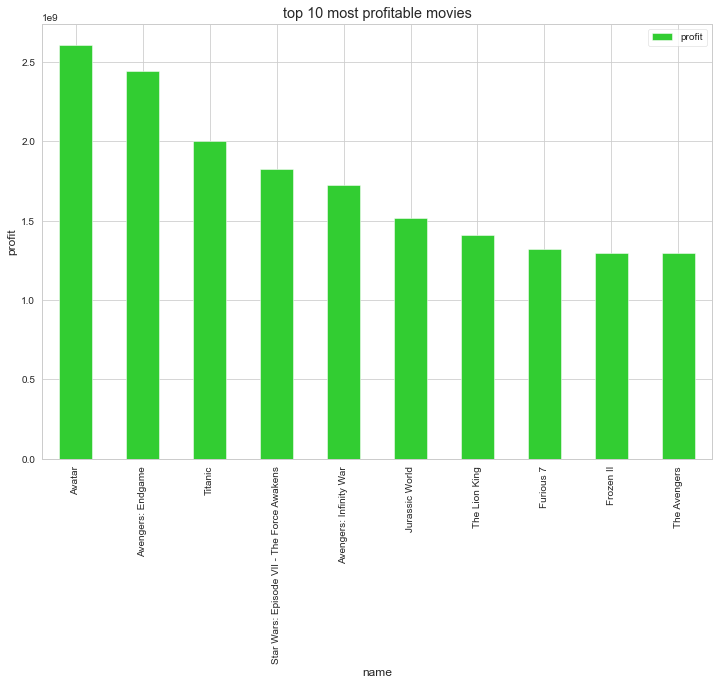

In [92]:

df.head(10).plot(x="name", y="profit", kind="bar",color='limegreen' )
plt.title('top 10 most profitable movies')
plt.ylabel('profit')

Text(0, 0.5, 'profit')

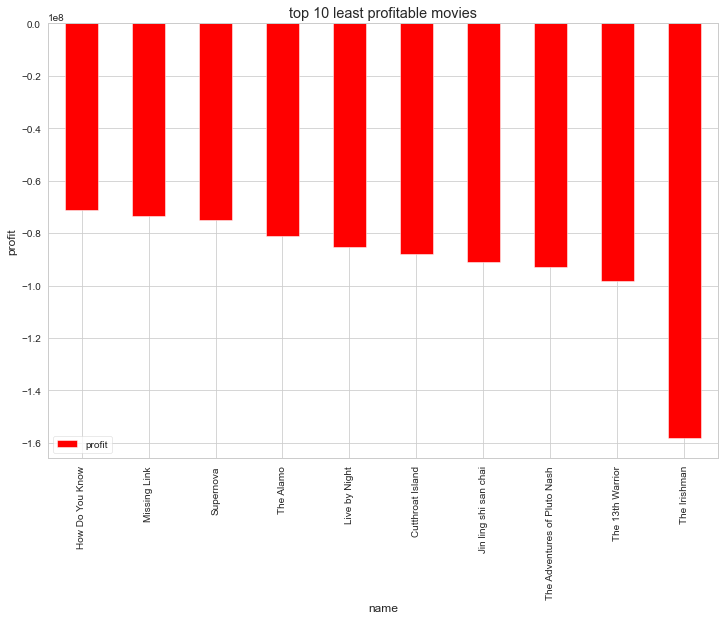

In [93]:
df.tail(10).plot(x="name", y="profit", kind="bar",color='red' )
plt.title('top 10 least profitable movies')
plt.ylabel('profit')

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


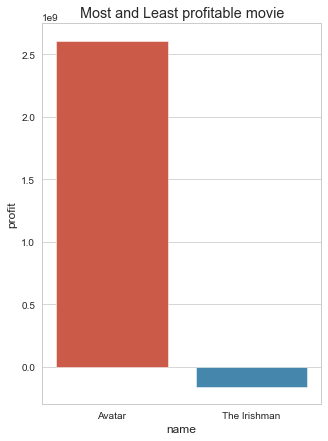

In [94]:
plt.figure(figsize=(5,7))
mm=df[ (df.profit==df['profit'].min())|(df.profit==df['profit'].max())]
sns.barplot(mm['name'], mm['profit'])
plt.title('Most and Least profitable movie')
plt.show()

### How has the no. of votes changed over the years:

In [95]:

v=df.groupby('year')['votes'].mean()
v

year
1980     44581.967391
1981     29721.734513
1982     33186.277778
1983     29069.500000
1984     35724.053892
1985     27856.035000
1986     28671.404040
1987     32096.395000
1988     33819.225000
1989     34515.568528
1990     42085.404040
1991     37349.780000
1992     40001.890000
1993     50443.820000
1994     77719.000000
1995     72939.795000
1996     52164.165000
1997     77933.500000
1998     79559.200000
1999    101369.500000
2000     89864.500000
2001    107518.500000
2002    105563.000000
2003    109993.500000
2004    129202.610000
2005    113903.500000
2006    126059.000000
2007    130819.000000
2008    142129.000000
2009    133595.500000
2010    144785.279188
2011    151535.000000
2012    152431.658291
2013    165466.500000
2014    159966.500000
2015    119395.925000
2016    123499.000000
2017    105619.000000
2018     87361.000000
2019     77480.929293
2020     80227.666667
Name: votes, dtype: float64

### No. of votes have increased over the years because of greater audience, this is not true for 2020 because of the pandemic.

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


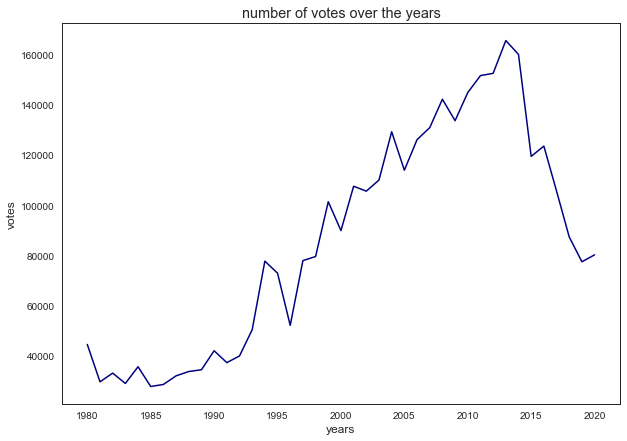

In [96]:
plt.figure(figsize=(10,7))
sns.set_style(style='white')
sns.lineplot(v.index, v.values, color='navy')
plt.title('number of votes over the years')
plt.xlabel('years')
plt.ylabel('votes')
plt.show()

### How has gross changed over the years:

In [97]:
g= df.groupby('year')['gross'].mean()

C:\Users\Shereen Gauba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


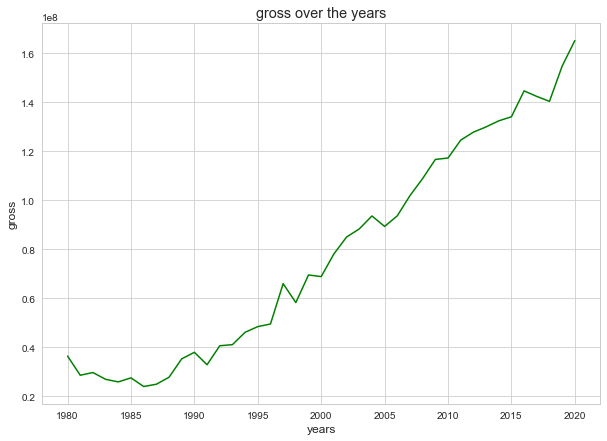

In [98]:
plt.figure(figsize=(10,7))
sns.set_style(style='whitegrid')
sns.lineplot(g.index, g.values, color='green')
plt.title('gross over the years')
plt.xlabel('years')
plt.ylabel('gross')
plt.show()

### Gross has drastically increased  over the years owing to similar reasons as to why budget has increased. 

### Which directors have directed the most no. of movies? Who are the top 10 directors with most no. of movies?

In [99]:
d=df.copy()
d=d[d.director!= 'Directors']
d.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+,month,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2847246203,Twentieth Century Fox,162.0,0,December,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2797501328,Marvel Studios,181.0,0,April,2441501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2201647264,Twentieth Century Fox,194.0,0,December,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2069521700,Lucasfilm,138.0,0,December,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2048359754,Marvel Studios,149.0,0,April,1727359754


In [100]:
direc= d.director.value_counts().head(20)
direc

Woody Allen          38
Clint Eastwood       31
Steven Spielberg     27
Ron Howard           24
Ridley Scott         23
Steven Soderbergh    23
Joel Schumacher      22
Barry Levinson       20
Tim Burton           19
Martin Scorsese      19
Garry Marshall       18
Oliver Stone         18
Stephen Frears       17
Richard Linklater    17
Sidney Lumet         17
Robert Zemeckis      17
Brian De Palma       17
Spike Lee            17
Walter Hill          17
Wes Craven           16
Name: director, dtype: int64

### Woody Allen followed by Clint Eastwood and Steven Spielberg are the most popular directors. 

Text(0, 0.5, 'no of movies')

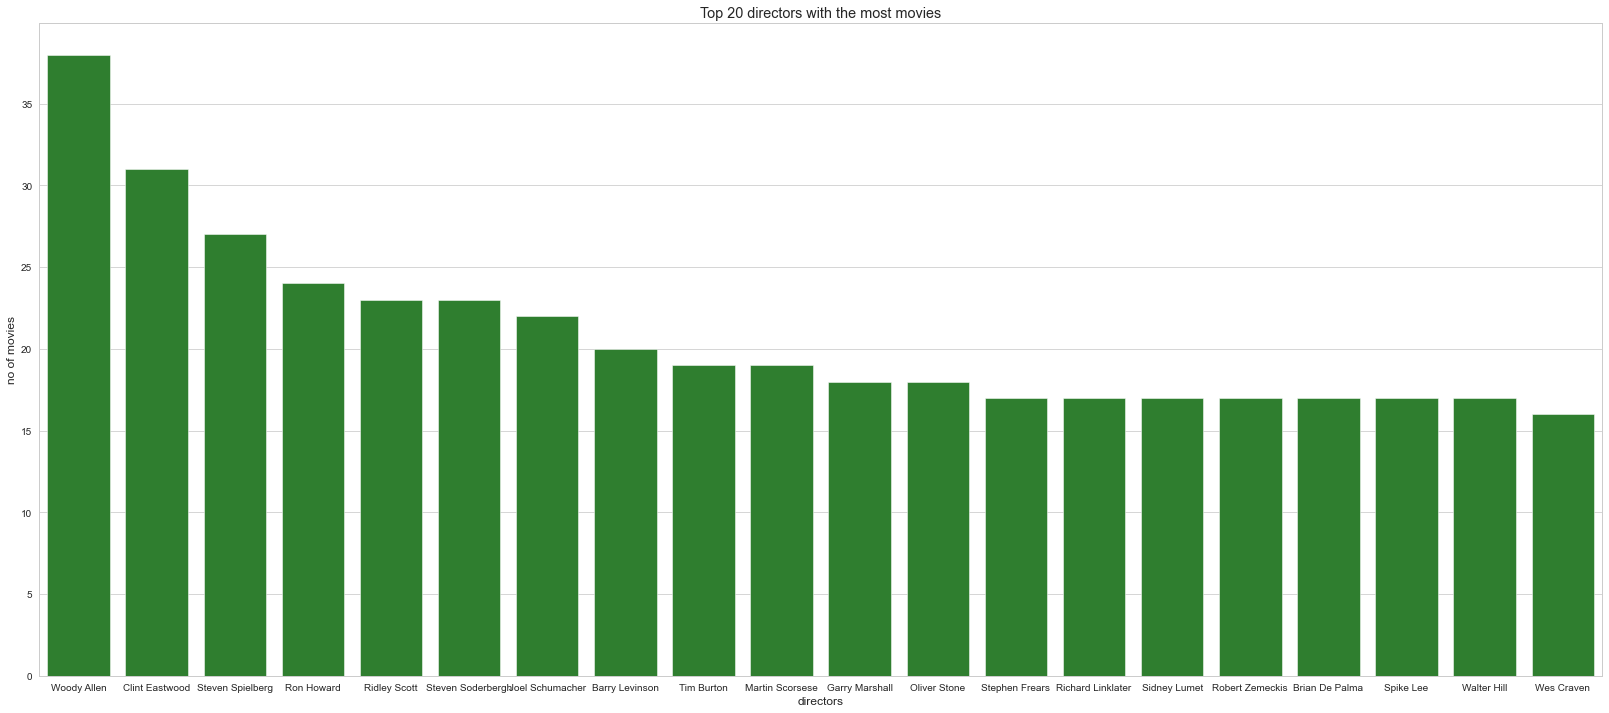

In [101]:
plt.figure(figsize=(28,12))
sns.set_style(style='whitegrid')
sns.barplot(x=direc.index, y=direc.values, color='forestgreen')
plt.title('Top 20 directors with the most movies' )
plt.xlabel('directors')
plt.ylabel('no of movies')

### Top director - star pairs who gain the highest votes

In [102]:
ds=df.groupby(['director','star']).count()
ds.sort_values(by='votes', ascending=False).head()

,,name,rating,genre,year,released,score,votes,writer,country,budget,gross,company,runtime,18+,month,profit
director,star,,,,,,,,,,,,,,,,
Clint Eastwood,Clint Eastwood,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Woody Allen,Woody Allen,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Dennis Dugan,Adam Sandler,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Tim Burton,Johnny Depp,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Martin Scorsese,Robert De Niro,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


<AxesSubplot:ylabel='director,star'>

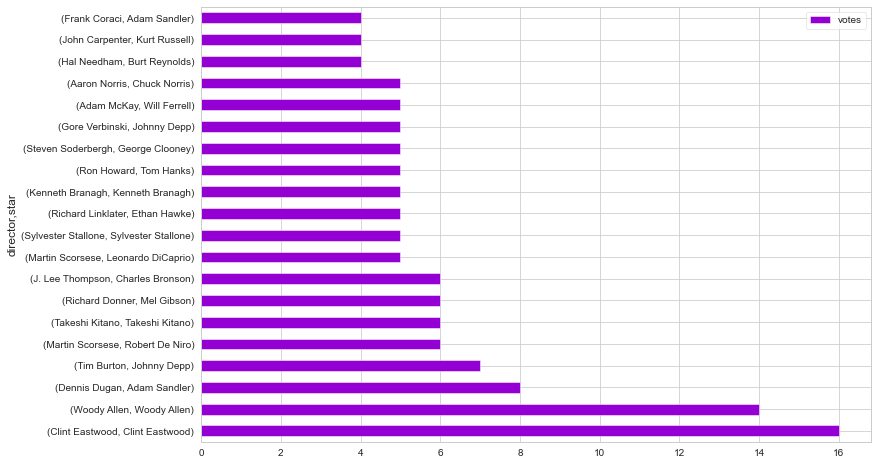

In [103]:

drst=ds.sort_values(by='votes', ascending=False).head(20)
drst.plot( y='votes',kind="barh", color='darkviolet')

### Top director-company pairs who gain the highest votes

In [104]:
dc=df.groupby(['director','company']).count()
dc.sort_values(by='votes', ascending=False).head()

,,name,rating,genre,year,released,score,votes,writer,star,country,budget,gross,runtime,18+,month,profit
director,company,,,,,,,,,,,,,,,,
Clint Eastwood,Warner Bros.,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Woody Allen,Jack Rollins & Charles H. Joffe Productions,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Lars von Trier,Zentropa Entertainments,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
James Ivory,Merchant Ivory Productions,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Steven Spielberg,Dreamworks Pictures,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


<AxesSubplot:ylabel='director,company'>

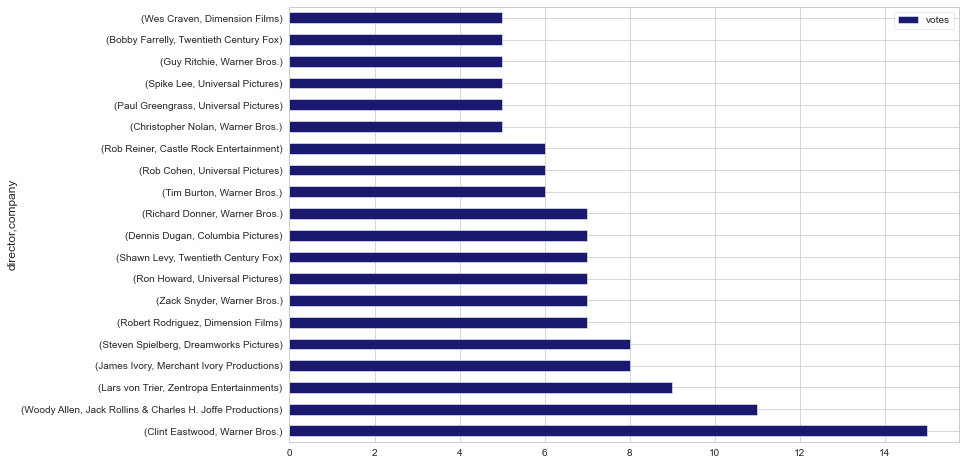

In [105]:
drcmp=dc.sort_values(by='votes', ascending=False).head(20)
sns.set_style(style='whitegrid')
drcmp.plot( y='votes',kind="barh", color='midnightblue')

### Which genre is preferred by the audience and thus has maximum no. of votes?

In [106]:
gen = df.groupby('genre').count()
gen.sort_values(by='votes', ascending=False)

,name,rating,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+,month,profit
genre,,,,,,,,,,,,,,,,,
Comedy,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242,2242
Action,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
Drama,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506
Crime,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550
Biography,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442
Adventure,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427
Animation,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337
Horror,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321
Fantasy,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44


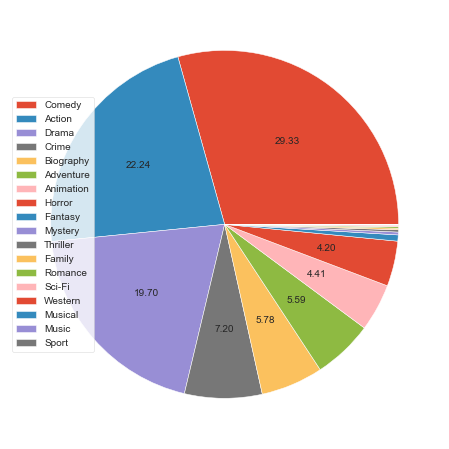

In [107]:

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 4 else ''

my_labels = ('Comedy', 'Action', 'Drama', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Fantasy', 'Mystery', 'Thriller', 'Family', 'Romance', 'Sci-Fi', 'Western', 'Musical', 'Music', 'Sport')


ax = df['genre'].value_counts().plot(kind='pie', figsize=(10,8), autopct=autopct, labels=None)

ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=6, labels=my_labels)

### Which genres (before and after 2000) earn the most ?

In [108]:
genr = after2000.groupby('genre').count()
genr.sort_values(by='gross', ascending=False).head()

,name,rating,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+
genre,,,,,,,,,,,,,,,
Comedy,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
Action,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998
Drama,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784
Biography,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284
Crime,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277


<AxesSubplot:ylabel='gross'>

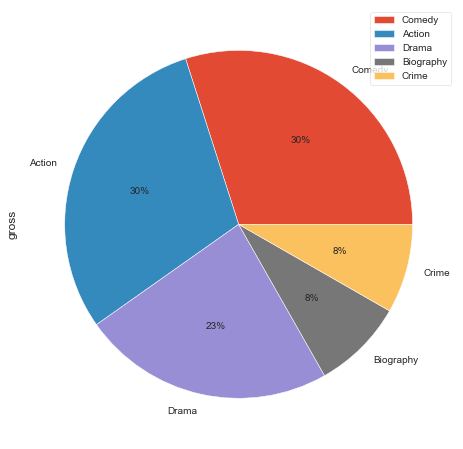

In [109]:
genr.sort_values(by='gross', ascending=False).head().plot(kind='pie', y='gross', autopct='%1.0f%%')

In [110]:
genrr = before2000.groupby('genre').count()
genrr.sort_values(by='gross', ascending=False).head()


,name,rating,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,18+
genre,,,,,,,,,,,,,,,
Comedy,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241
Drama,722,722,722,722,722,722,722,722,722,722,722,722,722,722,722
Action,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702
Crime,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273
Adventure,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217


<AxesSubplot:ylabel='gross'>

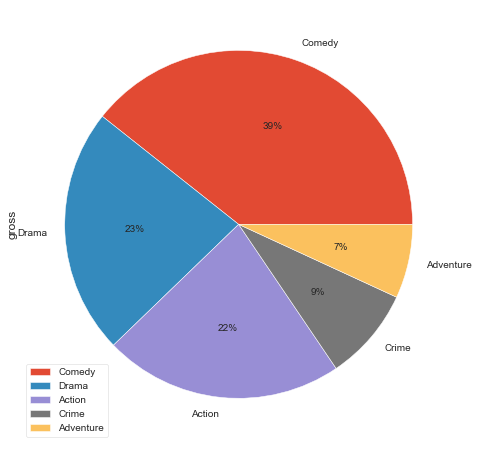

In [111]:
genrr.sort_values(by='gross', ascending=False).head().plot(kind='pie', y='gross', autopct='%1.0f%%')

# CONCLUSION & INTERPRETATION:

#### 1. Most movies are universal, few with parental guidance. 'G' earns the most revenue
#### 2. Budget and gross & votes and gross have high correlation between them
#### 3. The no. of movies (in this dataset) has not changed over the years except in 2020
#### 4. Sudden decline in 2020 is be because of the pandemic.
#### 5. US followed by the UK has the most no. of movie releases
#### 6. Most movies lie in the range of 80-130 minutes. Movies in the given range have the highest gross earnings 
#### 7. Higher the budget of the film higher the gross
#### 8.Gross and no. of votes have increased over the years
#### 9. Movies that gain the maximum votes are Comedy followed by action and then drama.  
#### 10. After Comedy, 'Action' movies made the most earnings after 2000 whereas before 2000 'Drama' genre made the most earnings. 
#### 11. After 2000, Biographies have started to make more earnings than the rest genres. Before 2000, Adventure used to come in the top 5 genres with the highest gross. 